In [1]:
import numpy as np
import matplotlib.colors as col
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import pdb
import time
import progressbar
import include.simulations.useQuasi3D as sim

## $E_r$ (Radial) Fields

<ipython-input-11-138c09dd3279>:23: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  Er_m0 = ax1.pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")
<ipython-input-11-138c09dd3279>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  Er_m0 = ax1.pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")


0.013663442929585774  min


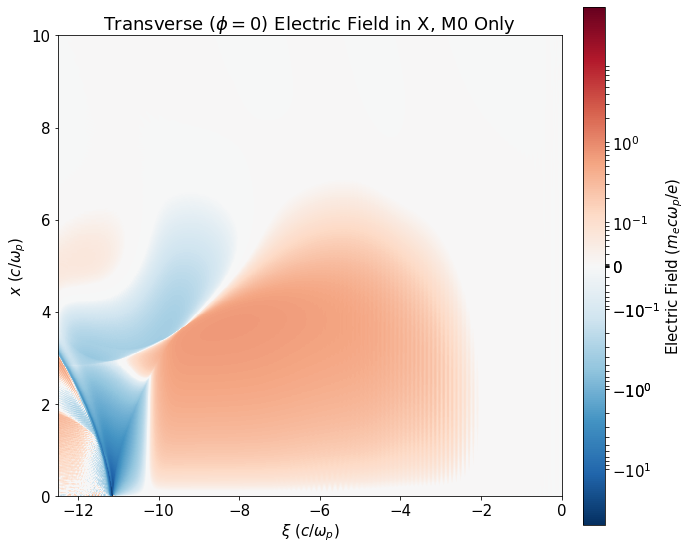

In [11]:
fname = "Er-plot-data.npz"
data = np.load(fname)
xiaxis = data['arr_0']
raxis = data['arr_1']
Er_full = data['arr_2']
Er_m0 = data['arr_3']
Er_m1 = data['arr_4']

start_time = time.time()
t0 = sim.getTime()

zaxis = [xi + t0 for xi in xiaxis]


fig1, ax1 = plt.subplots(figsize=(10,8))

fig1.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.9)

#fig.suptitle("Quasi3D Ex Field for $\\phi = 0$")

#ax.set(xlabel = '$\\xi$ ($c/\omega_p$)', ylabel = 'x ($c/\omega_p$)')

Er_m0 = ax1.pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")

ax1.set_ylim(0,10)
ax1.set(xlabel = r'$\xi$ ($c/\omega_p$)', ylabel = '$x$ ($c/\omega_p$)')
ax1.set_title('Transverse ($\phi = 0$) Electric Field in X, M0 Only')

tick_locations=[x*0.01 for x in range(2,10)]+ [x*0.01 for x in range(-10,-1)] + [x*0.1 for x in range(-10,10)] +[ x for x in range(-10,10)]
cbar_ax1 = fig1.add_axes([0.83, 0.05, 0.03, 0.9])

cbar1 = fig1.colorbar(Er_m0, cax=cbar_ax1, ticks=tick_locations, format=ticker.LogFormatterMathtext())

cbar1.set_label('Electric Field ($m_e c \omega_p / e$)')

print((time.time() - start_time)/60, " min")

#plt.savefig("fields.png",transparent=True)
fig1.savefig("Er-M0-fields.png",dpi=600,transparent=True)

## $E_r$ and $E_z$ (Transverse and Longitudinal) Fields

<ipython-input-5-c3dee88cf374>:47: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  Er_m0 = axs[0].pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")
<ipython-input-5-c3dee88cf374>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  Er_m0 = axs[0].pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")
<ipython-input-5-c3dee88cf374>:48: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  Ez = axs[1].pcolormesh(xiaxis, raxis

0.05010284980138143  min


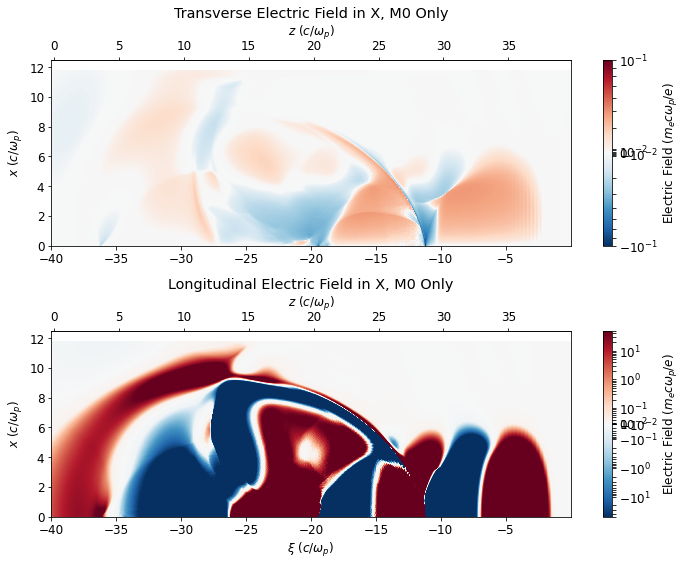

In [5]:
fname = "Ez-plot-data.npz"
data = np.load(fname)
xiaxis = data['arr_0']
raxis = data['arr_1']
Ez = data['arr_2']

fname = "Er-plot-data.npz"
data = np.load(fname)
xiaxis = data['arr_0']
raxis = data['arr_1']
Er_full = data['arr_2']
Er_m0 = data['arr_3']
Er_m1 = data['arr_4']

start_time = time.time()
t0 = sim.getTime()

def zaxis_func(xi):
    z = xi + t0
    return z

def xiaxis_func(z):
    xi = z - t0
    return xi

#zaxis = [xi + t0 for xi in xiaxis]

fig, axs = plt.subplots(2, figsize=(10,8))

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.9)

axs[0].set_ylim(0,12.5)
axs[1].set_ylim(0,12.5)
axs[0].set(ylabel = '$x$ ($c/\omega_p$)')
axs[1].set(xlabel = r'$\xi$ ($c/\omega_p$)', ylabel = '$x$ ($c/\omega_p$)')

secax0 = axs[0].secondary_xaxis('top', functions=(zaxis_func, xiaxis_func))
secax0.set_xlabel(r'$z$ ($c/\omega_p$)')

secax1 = axs[1].secondary_xaxis('top', functions=(zaxis_func, xiaxis_func))
secax1.set_xlabel(r'$z$ ($c/\omega_p$)')


axs[0].set_title('Transverse Electric Field in X, M0 Only')
axs[1].set_title('Longitudinal Electric Field in X, M0 Only')

Er_m0 = axs[0].pcolormesh(xiaxis, raxis, Er_m0, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-50,vmax=50),cmap="RdBu_r")
Ez = axs[1].pcolormesh(xiaxis, raxis, Ez, norm=col.SymLogNorm(linthresh=0.03,linscale=0.03,vmin=-0.1,vmax=0.1),cmap="RdBu_r")

tick_locations=[x*0.01 for x in range(2,10)]+ [x*0.01 for x in range(-10,-1)] + [x*0.1 for x in range(-10,10)] +[ x for x in range(-10,10)]
#cbar_ax = fig.add_axes([0.83, 0.05, 0.03, 0.9])

cbar1 = fig.colorbar(Ez, ax=axs[0])
cbar2 = fig.colorbar(Er_m0, ax=axs[1])

cbar1.set_label('Electric Field ($m_e c \omega_p / e$)')
cbar2.set_label('Electric Field ($m_e c \omega_p / e$)')

print((time.time() - start_time)/60, " min")

fig.tight_layout(pad=1.0)
fig.savefig("E-M0-fields.png",dpi=600,transparent=True)